In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from deside.utility import set_fig_style, check_dir
from deside.utility.read_file import ReadH5AD
from deside.simulation import segment_generation_fraction, random_generation_fraction
set_fig_style(font_family='Arial', font_size=8)

2024-09-14 12:27:48.799091: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
cell_type_3 = [f'cell_type_{i}' for i in range(3)]
cell_type_3

['cell_type_0', 'cell_type_1', 'cell_type_2']

In [3]:
cell_type_7 = [f'cell_type_{i}' for i in range(7)]
cell_type_7

['cell_type_0',
 'cell_type_1',
 'cell_type_2',
 'cell_type_3',
 'cell_type_4',
 'cell_type_5',
 'cell_type_6']

In [4]:
cell_type_16 = [f'cell_type_{i}' for i in range(16)]
cell_type_16

['cell_type_0',
 'cell_type_1',
 'cell_type_2',
 'cell_type_3',
 'cell_type_4',
 'cell_type_5',
 'cell_type_6',
 'cell_type_7',
 'cell_type_8',
 'cell_type_9',
 'cell_type_10',
 'cell_type_11',
 'cell_type_12',
 'cell_type_13',
 'cell_type_14',
 'cell_type_15']

In [5]:
n_samples = 10000
cell_prop_random3 = random_generation_fraction(n_samples=n_samples, cell_types=cell_type_3)
cell_prop_random7 = random_generation_fraction(n_samples=n_samples, cell_types=cell_type_7)
cell_prop_random16 = random_generation_fraction(n_samples=n_samples, cell_types=cell_type_16)

In [6]:
cell_prop_segment3 = segment_generation_fraction(n_samples=n_samples, cell_types=cell_type_3)
cell_prop_segment7 = segment_generation_fraction(n_samples=n_samples, cell_types=cell_type_7)
cell_prop_segment16 = segment_generation_fraction(n_samples=n_samples, cell_types=cell_type_16)

In [7]:
cell_prop_d1 = pd.read_csv('generated_frac_Mixed_N100K_segment_D1.csv', index_col=0)
cell_prop_d1.head(2)

,Non-plasma B cells,Plasma B cells,CD4 T,CD8 T (GZMK high),CD8 T effector,DC,Endothelial Cells,Cancer Cells,CAFs,Myofibroblasts,Macrophages,Mast Cells,NK,Neutrophils,Double-neg-like T,Monocytes
s_segment_0_1008,0.0000,0.0057,0.0223,0.0000,0.0001,0.0000,0.0003,0.1221,0.7998,0.0,0.0497,0.0000,0.0,0.0000,0.0000,0.0
s_segment_0_101,0.0001,0.0000,0.0011,0.0118,0.0001,0.0834,0.1451,0.5288,0.1635,0.0,0.0000,0.0141,0.0,0.0248,0.0272,0.0


In [8]:
# cell_prop_ascites = ReadH5AD('../datasets/from_scaden/ascite_scaden_log2cpm1p.h5ad').get_cell_fraction()
# cell_prop_ascites.head(2)

,CD8 T,Monocytes,Cancer Cells,NK,DC,CD4 T,Fibroblasts
index,,,,,,,
0-0,0.087,0.109,0.089,0.369,0.244,0.099,0.004
1-0,0.016,0.189,0.149,0.186,0.120,0.160,0.179


In [9]:
# cell_prop_ascites.max()

CD8 T           1.0
Monocytes       1.0
Cancer Cells    1.0
NK              1.0
DC              1.0
CD4 T           1.0
Fibroblasts     1.0
dtype: float64

In [10]:
cell_prop_random16.max()

cell_type_0     0.19
cell_type_1     0.19
cell_type_2     0.19
cell_type_3     0.18
cell_type_4     0.19
cell_type_5     0.19
cell_type_6     0.18
cell_type_7     0.18
cell_type_8     0.20
cell_type_9     0.21
cell_type_10    0.18
cell_type_11    0.19
cell_type_12    0.19
cell_type_13    0.21
cell_type_14    0.21
cell_type_15    0.17
dtype: float64

In [11]:
fig_dir = './results/reviewer2_q3/'
check_dir(fig_dir)

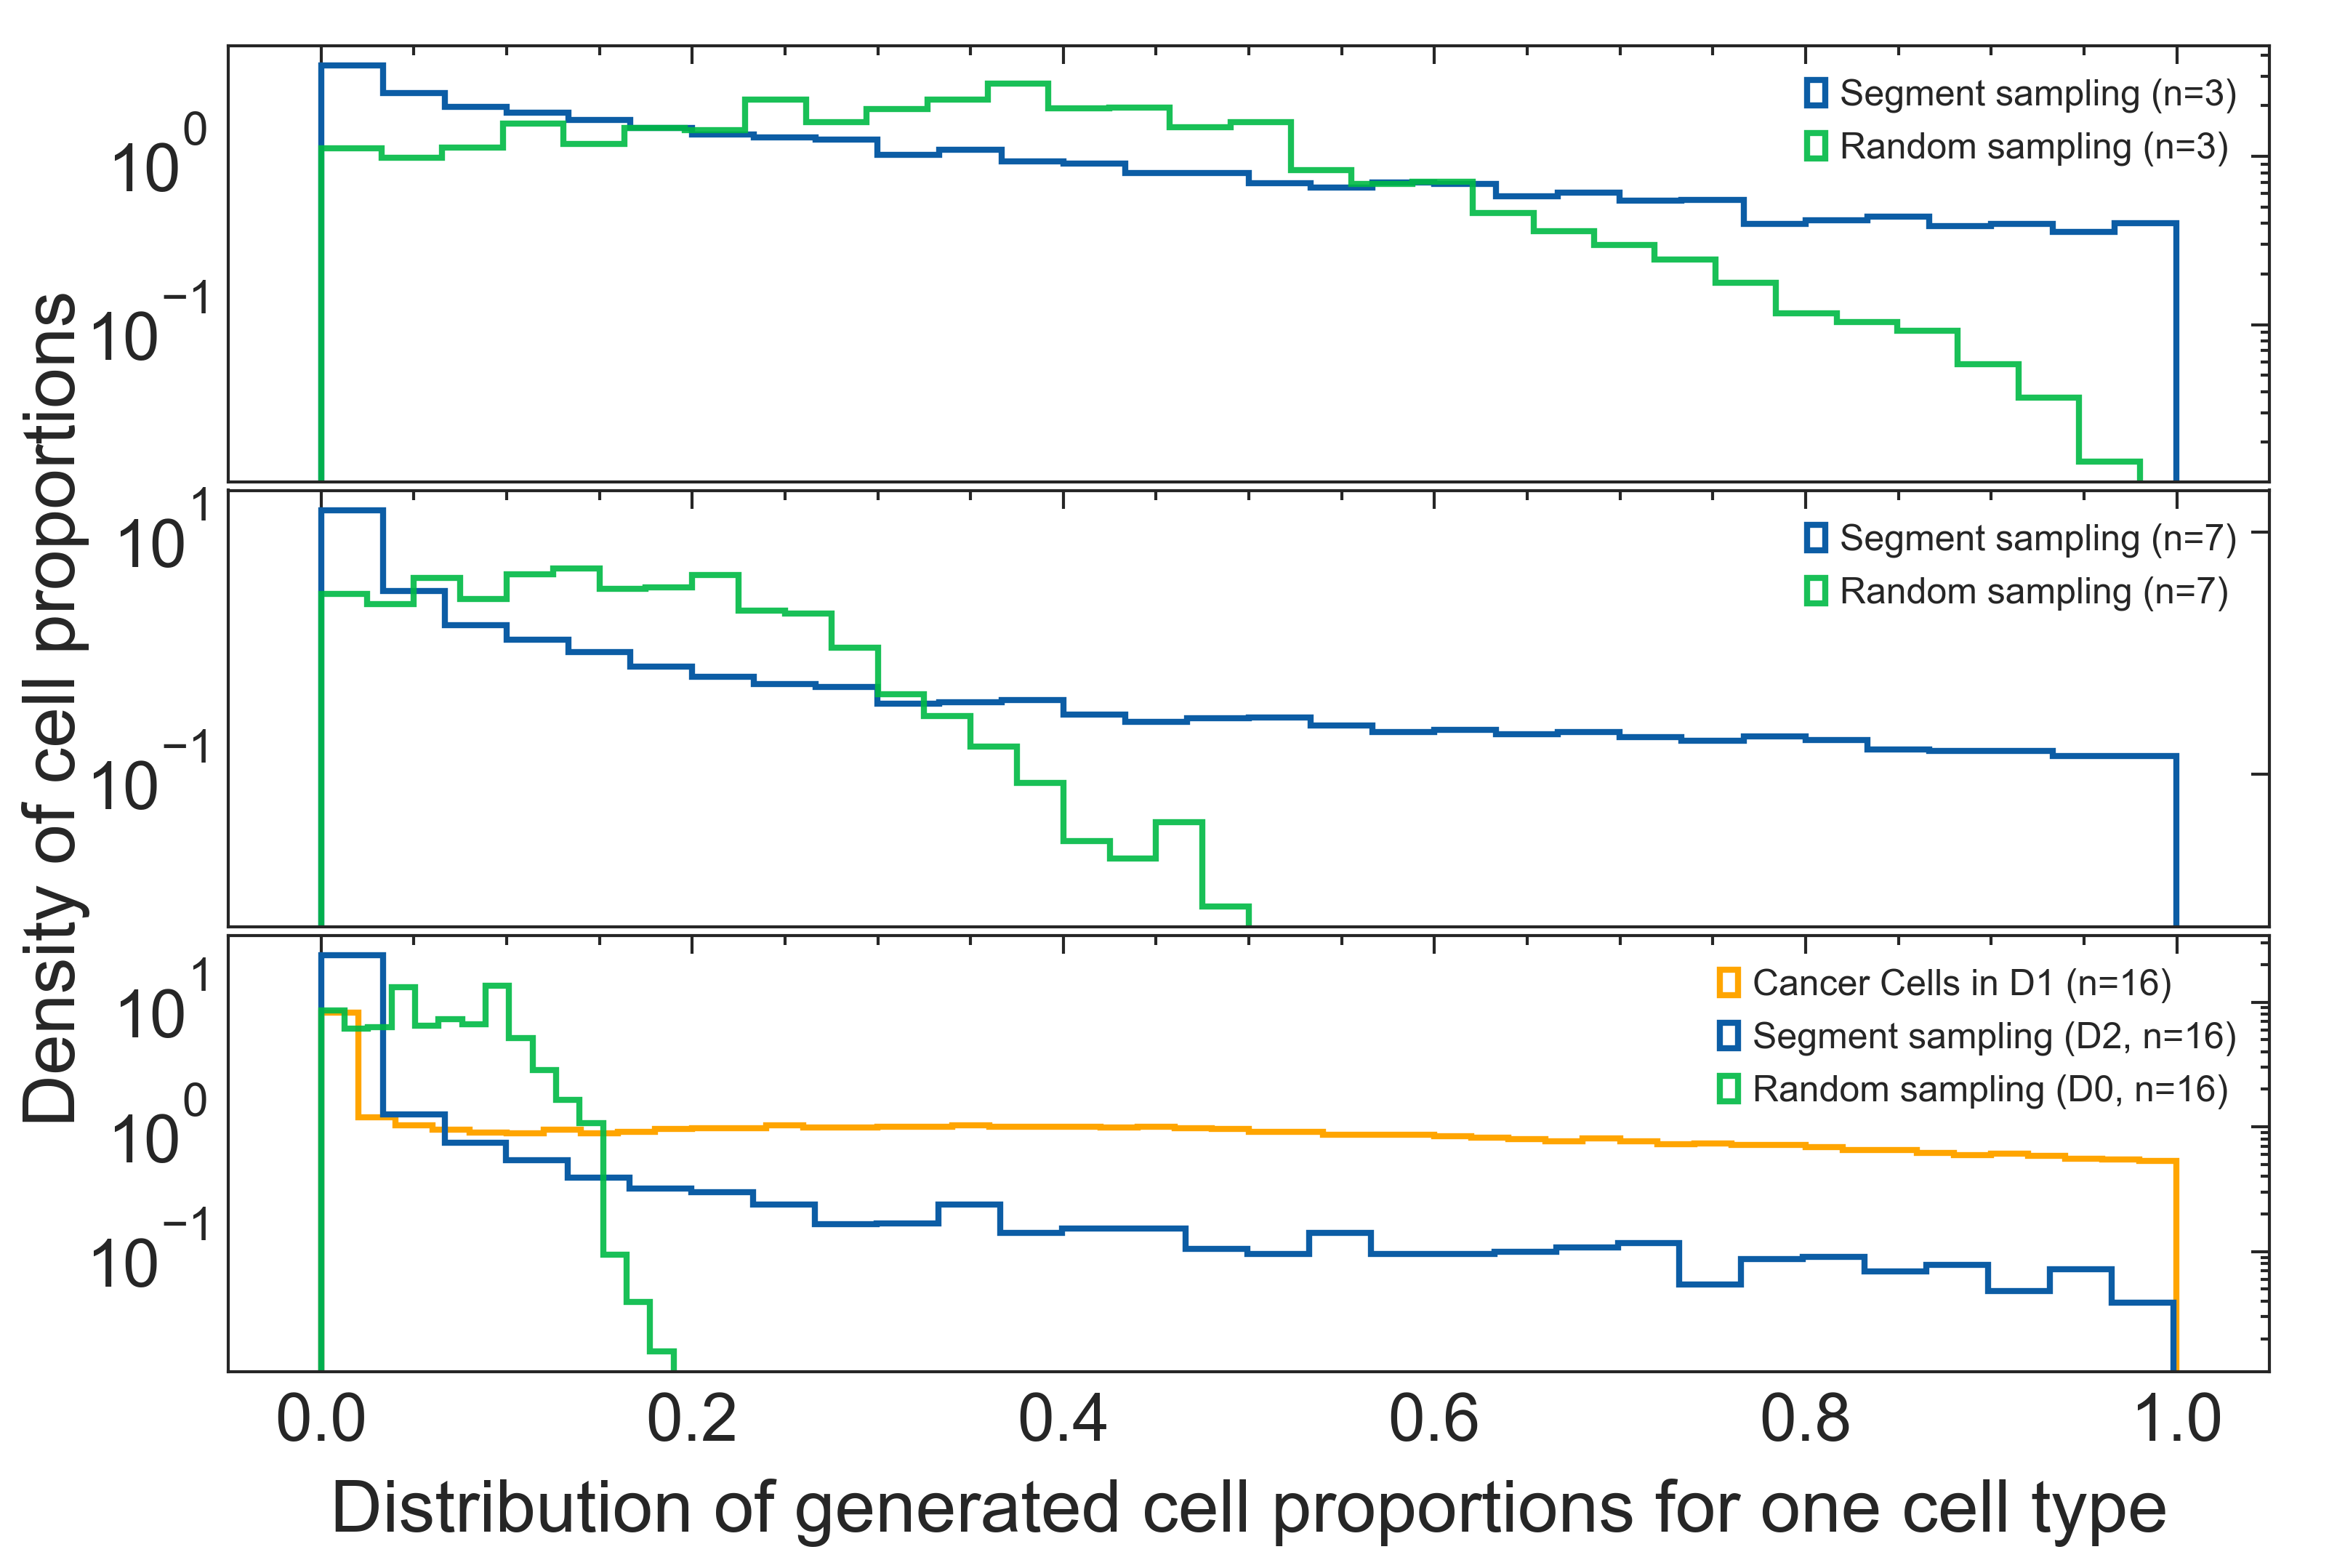

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(6, 4.), nrows=3, sharex=True)
plt.subplots_adjust(wspace=0.1, hspace=0.02)
ax1.set_yscale('log')
ax1.hist(cell_prop_segment3['cell_type_0'], bins=30, histtype='step', label='Segment sampling (n=3)', density=True)
ax1.hist(cell_prop_random3['cell_type_0'], bins=30, histtype='step', label='Random sampling (n=3)', density=True, alpha=.9)
ax1.legend(fontsize=6)

ax2.set_yscale('log')
# ax2.hist(cell_prop_ascites['CD4 T'], bins=30, histtype='step', label='CD4 T in Scaden-ascites (n=7)', density=True, color='orange')
ax2.hist(cell_prop_segment7['cell_type_0'], bins=30, histtype='step', label='Segment sampling (n=7)', density=True)
ax2.hist(cell_prop_random7['cell_type_0'], bins=20, histtype='step', label='Random sampling (n=7)', density=True, alpha=.9)
ax2.legend(fontsize=6)

ax3.set_yscale('log')
ax3.hist(cell_prop_d1['Cancer Cells'], bins=50, histtype='step', label='Cancer Cells in D1 (n=16)', density=True, color='orange')
ax3.hist(cell_prop_segment16['cell_type_0'], bins=30, histtype='step', label='Segment sampling (D2, n=16)', density=True)
ax3.hist(cell_prop_random16['cell_type_0'], bins=15, histtype='step', label='Random sampling (D0, n=16)', density=True, alpha=.9)
ax3.legend(fontsize=6)

# plt.legend()
# plt.tight_layout()

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Distribution of generated cell proportions for one cell type")
plt.ylabel("Density of cell proportions")

plt.savefig('results/reviewer2_q3/segment_random_sampling_comparison.svg', dpi=300)

### $\Delta$ CCC between the results of segment sampling (without filtering) and random sampling

In [13]:
ccc_segment_16 = pd.read_csv('../results/whole_workflow_20231110_12ds_subtypes/DeSide_03_new_ds_subtypes_all_range/Mixed_N100K_segment_without_filtering/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-DeSide_D1D2-metrics.csv', index_col=0)
print(ccc_segment_16.shape)
ccc_segment_16['model'] = 'Segment Sampling (n=16)'
ccc_segment_16.head(2)

(19, 3)


,corr,rmse,ccc,model
ACC,0.851473,0.151926,0.471050,Segment Sampling (n=16)
BLCA,0.749746,0.116597,0.714548,Segment Sampling (n=16)


In [14]:
ccc_random_16 = pd.read_csv('../results/whole_workflow_20231110_12ds_subtypes/DeSide_03_new_ds_subtypes_all_range/Mixed_N100K_random/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-DeSide_D1D2-metrics.csv', index_col=0)
print(ccc_random_16.shape)
ccc_random_16['model'] = 'Random Sampling (n=16)'
ccc_random_16.head(2)

(19, 3)


,corr,rmse,ccc,model
ACC,0.227073,0.746443,0.010704,Random Sampling (n=16)
BLCA,0.413852,0.536112,0.057327,Random Sampling (n=16)


In [15]:
ccc_segment_16['delta_CCC'] = ccc_segment_16['ccc'] - ccc_random_16['ccc']
ccc_segment_16['d_model'] = 'Segment - Random (n=16)'
ccc_segment_16.head(2)

,corr,rmse,ccc,model,delta_CCC,d_model
ACC,0.851473,0.151926,0.471050,Segment Sampling (n=16),0.460345,Segment - Random (n=16)
BLCA,0.749746,0.116597,0.714548,Segment Sampling (n=16),0.657221,Segment - Random (n=16)


In [16]:
ccc_segment_7 = pd.read_csv('../results/whole_workflow_20240704_7_celltypes/DeSide_7_cell_types/Mixed_N100K_segment_without_filtering/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-DeSide_D1D2-metrics.csv', index_col=0)
print(ccc_segment_7.shape)
ccc_segment_7['model'] = 'Segment Sampling (n=7)'
ccc_segment_7.head(2)

(19, 3)


,corr,rmse,ccc,model
ACC,0.770834,0.122438,0.594454,Segment Sampling (n=7)
BLCA,0.740926,0.135723,0.677562,Segment Sampling (n=7)


In [17]:
ccc_random_7 = pd.read_csv('../results/whole_workflow_20240704_7_celltypes/DeSide_7_cell_types/Mixed_N100K_random/predicted_cell_fraction_tcga/pred_cancer_cell_prop_vs_cpe-DeSide_D1D2-metrics.csv', index_col=0)
print(ccc_random_7.shape)
ccc_random_7['model'] = 'Random Sampling (n=7)'
ccc_random_7.head(2)

(19, 3)


,corr,rmse,ccc,model
ACC,0.775343,0.313348,0.149342,Random Sampling (n=7)
BLCA,0.715613,0.120251,0.680029,Random Sampling (n=7)


In [18]:
ccc_segment_7['delta_CCC'] = ccc_segment_7['ccc'] - ccc_random_7['ccc']
ccc_segment_7['d_model'] = 'Segment - Random (n=7)'
ccc_segment_7.head(2)

,corr,rmse,ccc,model,delta_CCC,d_model
ACC,0.770834,0.122438,0.594454,Segment Sampling (n=7),0.445113,Segment - Random (n=7)
BLCA,0.740926,0.135723,0.677562,Segment Sampling (n=7),-0.002467,Segment - Random (n=7)


In [19]:
all_ccc = pd.concat([ccc_segment_7, ccc_segment_16])
all_ccc.shape

(38, 6)

In [20]:
all_ccc.sort_values(by=['delta_CCC', 'd_model'], ascending=False, inplace=True)
all_ccc.head(2)

,corr,rmse,ccc,model,delta_CCC,d_model
LUAD,0.792997,0.086044,0.766848,Segment Sampling (n=16),0.729827,Segment - Random (n=16)
KIRP,0.769899,0.093024,0.736518,Segment Sampling (n=16),0.716230,Segment - Random (n=16)


In [21]:
all_ccc['cancer_type'] = all_ccc.index

In [22]:
# color_2 = [sns.color_palette("tab20")[i] for i in range(2)]
color_2 = ['dodgerblue', 'lightcoral']
sns.color_palette(color_2)

[(0.11764705882352941, 0.5647058823529412, 1.0),
 (0.9411764705882353, 0.5019607843137255, 0.5019607843137255)]

In [23]:
all_ccc2 = pd.concat([ccc_segment_7, ccc_segment_16, ccc_random_7, ccc_random_16])
all_ccc2.shape

(76, 6)

In [24]:
all_ccc2.sort_values(by=['ccc'], ascending=False, inplace=True)
all_ccc2.head(2)

,corr,rmse,ccc,model,delta_CCC,d_model
KICH,0.890219,0.067516,0.798481,Segment Sampling (n=7),0.533033,Segment - Random (n=7)
LUAD,0.806748,0.088688,0.793548,Segment Sampling (n=7),0.071361,Segment - Random (n=7)


In [25]:
all_ccc2['cancer_type'] = all_ccc2.index

In [26]:
all_ccc2 = all_ccc2.pivot(columns=['model'], values=['ccc'])
all_ccc2.shape

(19, 4)

In [27]:
all_ccc2.head(2)

ccc                                                \
model Random Sampling (n=16) Random Sampling (n=7) Segment Sampling (n=16)   
ACC                 0.010704              0.149342                0.471050   
BLCA                0.057327              0.680029                0.714548   

                              
model Segment Sampling (n=7)  
ACC                 0.594454  
BLCA                0.677562

In [28]:
all_ccc2['cancer_type'] = all_ccc2.index
all_ccc2['delta_ccc'] = all_ccc2[('ccc', 'Segment Sampling (n=16)')] - all_ccc2[('ccc', 'Random Sampling (n=16)')]
all_ccc2.sort_values(by=['delta_ccc'], ascending=False, inplace=True)
all_ccc2.head(2)

ccc                                                \
model Random Sampling (n=16) Random Sampling (n=7) Segment Sampling (n=16)   
LUAD                0.037021              0.722186                0.766848   
KIRP                0.020288              0.302102                0.736518   

                             cancer_type delta_ccc  
model Segment Sampling (n=7)                        
LUAD                0.793548        LUAD  0.729827  
KIRP                0.769360        KIRP  0.716230

In [29]:
all_ccc2[('ccc', 'Random Sampling (n=7)')  ]

LUAD    0.722186
KIRP    0.302102
LUSC    0.752029
BLCA    0.680029
CESC    0.591499
BRCA    0.460017
HNSC    0.645360
COAD    0.631858
READ    0.534377
KICH    0.265448
GBM     0.267411
LIHC    0.224985
ACC     0.149342
KIRC    0.114236
OV      0.271895
UCEC    0.339888
PRAD    0.236367
LGG     0.162351
THCA    0.164753
Name: (ccc, Random Sampling (n=7)), dtype: float64

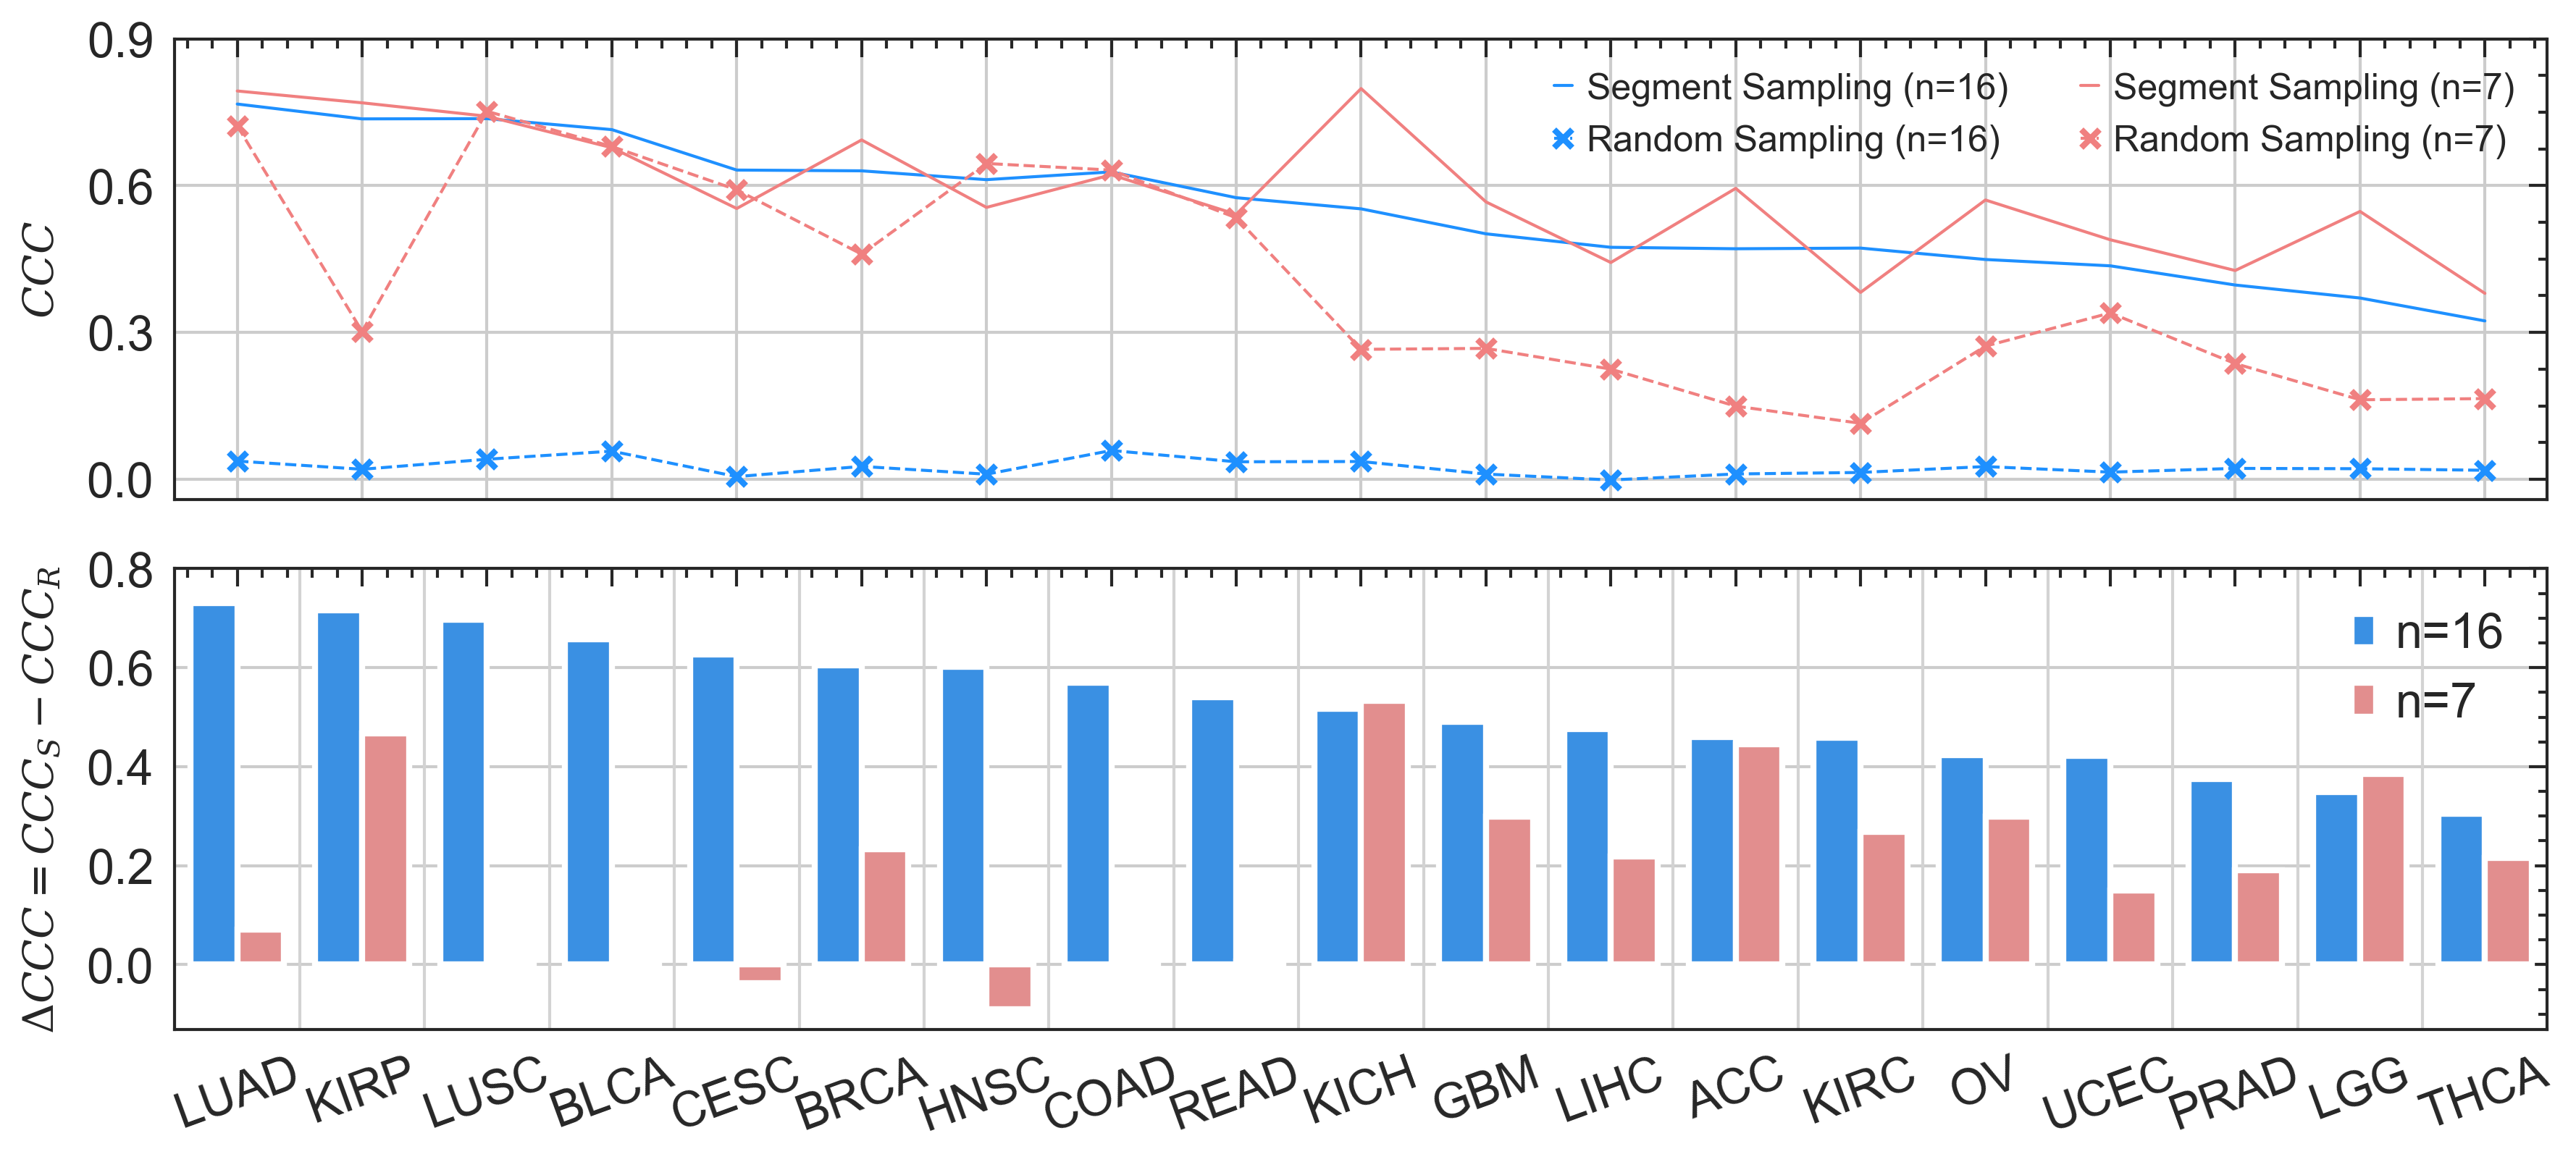

In [30]:
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(7, 3.), sharex=True)
plt.subplots_adjust(hspace=0.15)
ax.plot(all_ccc2[('ccc', 'Segment Sampling (n=16)')],    label='Segment Sampling (n=16)',c='dodgerblue', linewidth=0.5,)
ax.plot(all_ccc2[('ccc', 'Random Sampling (n=16)') ],    label='Random Sampling (n=16)', c='dodgerblue', linewidth=0.5, linestyle='--', marker='x', ms=3)

ax.plot(all_ccc2[('ccc', 'Segment Sampling (n=7)') ],    label='Segment Sampling (n=7)', c='lightcoral', linewidth=0.5)
ax.plot(all_ccc2[('ccc', 'Random Sampling (n=7)')  ],    label='Random Sampling (n=7)',  c='lightcoral', linewidth=0.5, linestyle='--', marker='x', ms=3)


ax.set_ylabel('$CCC$', fontsize=7)
# ax.set_xticks(range(19), all_ccc2.index.to_list(), rotation=20, fontsize=8)
ax.set_yticks([0, 0.3, 0.6, 0.9])
ax.grid()
ax.legend(fontsize=6, loc='best', ncol=2)
ax.tick_params(axis='y', labelsize=8)

# the second subplot
width = 0.75
hue_order_ds2 = ['Segment - Random (n=16)', 'Segment - Random (n=7)']
g2 = sns.barplot(all_ccc, x="cancer_type", y="delta_CCC", hue="d_model", palette=color_2, ax=ax2, hue_order=hue_order_ds2, 
                 width=width, order=all_ccc2.index.to_list())
# ax2.legend()
g2legend = g2.legend(frameon=False, fontsize=8)
for t in g2legend.texts:
    t.set_text(t.get_text().replace('Segment - Random (', ''))
    t.set_text(t.get_text().replace(')', ''))
# sns.move_legend(g4, 'upper left',  bbox_to_anchor=(0, 1.33), ncol=2, title=None, frameon=False, fontsize=6, borderpad=0, handletextpad=0)
# g4.legend([], [], frameon=False)

g2.set_xlabel('')
g2.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
g2.set_ylabel(f'$\Delta CCC=CCC_S-CCC_R$', fontsize=7)
ax2.grid(axis='y')
for _x in range(19):
    ax2.axvline(_x - 0.5, color='lightgray', linewidth=0.5)
ax2.tick_params(axis='x', labelrotation=20, labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
# plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'ccc_comparison_segment_random_diff_n2.svg'), dpi=300)